# Part I - Analysis on abalone dataset

## Setup package imports

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

## Setup defined Imports

In [2]:
from LeastSquaresLinearRegression import LeastSquaresLinearRegressor
from evaluate_perf_metrics import (
    calc_perf_metric__absolute_error, calc_perf_metric__squared_error,
    calc_perf_metrics_for_regressor_on_dataset)

## Load Abalone Dataset 

In [3]:
x_train = pd.read_csv('data_abalone/x_train.csv')
#x_train.head()
y_train = pd.read_csv('data_abalone/y_train.csv')
#y_train.head()
x_valid = pd.read_csv('data_abalone/x_valid.csv')
#x_valid.head()
y_valid = pd.read_csv('data_abalone/y_valid.csv')
#y_valid.head()
x_test = pd.read_csv('data_abalone/x_test.csv')
#x_test.head()
y_test = pd.read_csv('data_abalone/y_test.csv')
#y_test.head()

## Histograms of response variable 'rings'

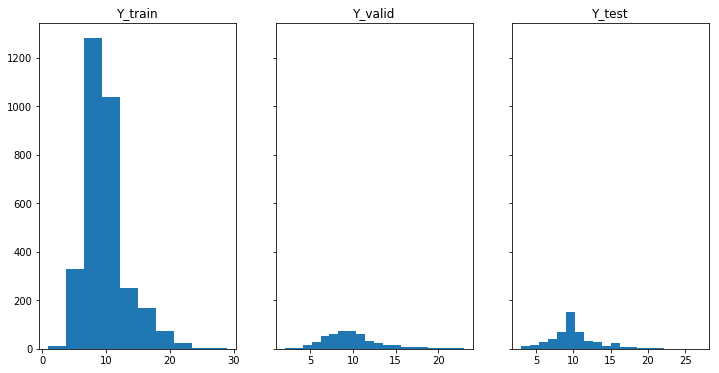

In [4]:
y1 = y_train.values
y2 = y_valid.values
y3 = y_test.values

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,6))
ax1.hist(y1)
ax1.set_title('Y_train')
ax2.hist(y2, bins=20)
ax2.set_title('Y_valid')
ax3.hist(y3, bins=20)
ax3.set_title('Y_test')
plt.show()

## Descriptive statistics

In [5]:
y_train.describe()

,rings
count,3176.000000
mean,9.902393
std,3.205887
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


## Scatterplots of 'rings' vs 'diam' and 'rings' vs 'shucked'

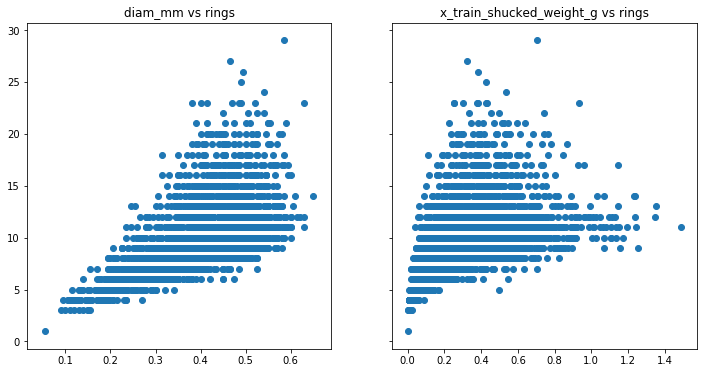

In [6]:
x_train_diam_mm = x_train.diam_mm.values
y_train_rings = y_train.values
x_train_shucked_weight_g = x_train.shucked_weight_g.values

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1.scatter(x_train_diam_mm, y_train_rings)
ax1.set_title('diam_mm vs rings')
ax2.scatter(x_train_shucked_weight_g, y_train_rings)
ax2.set_title('x_train_shucked_weight_g vs rings')
plt.show()

## Baseline Prediction using Mean and Median - Mean Squared Error(MSE)

In [7]:
# Calculate MSE for Mean and Median Baseline Predictors

## Training Set
y_train_mean_mse = calc_perf_metric__squared_error(y_train.mean(), y_train)
y_train_median_mse = calc_perf_metric__squared_error(y_train.median(), y_train)

## Testing Set
y_test_mean_mse = calc_perf_metric__squared_error(y_test.mean(), y_test)
y_test_median_mse = calc_perf_metric__squared_error(y_test.median(), y_test)

## Validation Set
y_valid_mean_mse = calc_perf_metric__squared_error(y_valid.mean(), y_valid)
y_valid_median_mse = calc_perf_metric__squared_error(y_valid.median(), y_valid)

results = pd.DataFrame({'split':['train','valid','test'],
                       'guess-mean':[y_train_mean_mse.rings, y_valid_mean_mse.rings, y_test_mean_mse.rings],
                       'guess-median':[y_train_median_mse.rings, y_valid_median_mse.rings, y_test_median_mse.rings]
                       })
results

,split,guess-mean,guess-median
0,train,10.274478,11.088791
1,valid,10.933100,10.934000
2,test,10.549324,10.550000


## Linear Regression Model for two features - MSE for train, valid and test splits

In [8]:
## LeastSquaresLinearRegression.py. This file defines a LeastSquaresLinearRegressor class with the two key methods of the usual sklearn regression API: fit and predict.
##edit this file to complete the fit and the predict methods.

In [9]:
x_train[['diam_mm', 'shucked_weight_g']].head()

,diam_mm,shucked_weight_g
0,0.325,0.2170
1,0.445,0.3810
2,0.475,0.3465
3,0.350,0.2365
4,0.555,0.6470


In [10]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
# fit and evaluate 2 features
linear_regressor_2feats.fit(x_train[['diam_mm','shucked_weight_g']],y_train)

lin_reg_2f_train = linear_regressor_2feats.predict(x_train[['diam_mm','shucked_weight_g']])
mse_train_2f = calc_perf_metric__squared_error(y_train, lin_reg_2f_train)

lin_reg_2f_test = linear_regressor_2feats.predict(x_test[['diam_mm','shucked_weight_g']])
mse_test_2f = calc_perf_metric__squared_error(y_test, lin_reg_2f_test)

lin_reg_2f_valid = linear_regressor_2feats.predict(x_valid[['diam_mm','shucked_weight_g']])
mse_valid_2f = calc_perf_metric__squared_error(y_valid, lin_reg_2f_valid)
results['linear regr (2 feats)'] = [mse_train_2f.rings, mse_valid_2f.rings, mse_test_2f.rings]
results

,split,guess-mean,guess-median,linear regr (2 feats)
0,train,10.274478,11.088791,6.496134
1,valid,10.933100,10.934000,6.534072
2,test,10.549324,10.550000,6.739824


## Linear Regression Model for all features - MSE for train, valid and test splits

In [11]:
linear_regressor_8feats = LeastSquaresLinearRegressor()
# fit and evaluate 8 features
linear_regressor_8feats.fit(x_train,y_train)

lin_reg_8f_train = linear_regressor_8feats.predict(x_train)
mse_train_8f = calc_perf_metric__squared_error(y_train, lin_reg_8f_train)

lin_reg_8f_test = linear_regressor_8feats.predict(x_test)
mse_test_8f = calc_perf_metric__squared_error(y_test, lin_reg_8f_test)

lin_reg_8f_valid = linear_regressor_8feats.predict(x_valid)
mse_valid_8f = calc_perf_metric__squared_error(y_valid, lin_reg_8f_valid)
results['linear regr (8 feats)'] = [mse_train_8f.rings, mse_valid_8f.rings, mse_test_8f.rings]

## Results Table for Mean Squared Error on Abalone

In [12]:
results

,split,guess-mean,guess-median,linear regr (2 feats),linear regr (8 feats)
0,train,10.274478,11.088791,6.496134,5.053198
1,valid,10.933100,10.934000,6.534072,5.206491
2,test,10.549324,10.550000,6.739824,4.573249


## Linear Regression Coef Interpretation

### Show the learned coefficients for the "2 features" dataset.

In [13]:
linear_regressor_2feats.w_F

array([[29.53045134],
       [-5.88134108]])

### Show the learned coefficients for the "8 features" dataset.

In [14]:
linear_regressor_8feats.w_F

array([[  0.44175158],
       [  5.38062998],
       [ 14.77869256],
       [ 12.86561885],
       [  9.3300084 ],
       [-21.54036538],
       [-12.34553444],
       [  5.5468362 ]])

## Model selection for K-Nearest Neighbor Regressor

In [15]:
# Apply K nearest neighbors regression to the full "8 feature" version of the abalone dataset. 
# Use the KNeighborsRegressor class provided by sklearn.

# Explore various values for the number of neighbors K: 1, 3, 5, 7, 9, 11, 21, 41, 61, 81, 101, 201, 401, 801. 
# Also include N, the total size of the training data.

#For each value, train a KNeighborsRegressor and evaluate it on the training set and the validation set.


In [16]:
n_neighbors = [1, 3, 5, 7, 11, 21, 41, 61, 81, 101, 201, 401, 801, 3176]
train_mse = []
valid_mse = []
test_mse = []
for K in n_neighbors:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred_train = model.predict(x_train) #make prediction on train set
    pred_test = model.predict(x_test) #make prediction on test set
    error_train = mean_squared_error(y_train, pred_train) #calculate mse for train set
    error_test = mean_squared_error(y_test, pred_test) #calculate mse for test set
    pred_valid = model.predict(x_valid) #make prediction on validation set
    error_validation = mean_squared_error(y_valid, pred_valid) #calculate mse for validation set
    train_mse.append(error_train) # store mse values
    test_mse.append(error_test) #store mse values
    valid_mse.append(error_validation)

### Make a line plot for mean-squared-error (MSE) vs K on the validation set

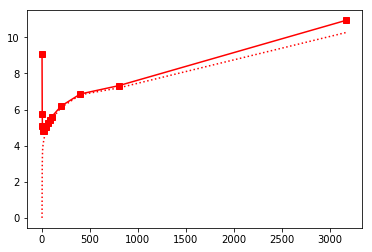

In [17]:
#plotting the mse values against k values
curve = pd.DataFrame(valid_mse) #elbow curve
plt.plot(n_neighbors, valid_mse, 'rs-')
plt.plot(n_neighbors, train_mse, 'r:')
plt.show()

### Make a ZOOMED IN line plot for mean-squared-error (MSE) vs K on the validation set

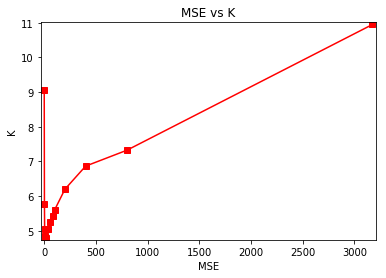

In [18]:
#plotting the rmse values against k values
plt.plot(n_neighbors, valid_mse, 'rs-')
plt.title('MSE vs K')
plt.xlabel('MSE')
plt.ylabel('K')
plt.margins(0.01)
plt.show()

In [19]:
# Table showing the MSE of the selected best K-NN regressor from previous step evaluated on all three splits
K=5 # best K-NN regressor selected from elbow curve
results['k-NN(8 feats)'] = [train_mse[2], valid_mse[2], test_mse[2]]

### Cumulative results table with K-Nearest Neighbor

In [20]:
results

,split,guess-mean,guess-median,linear regr (2 feats),linear regr (8 feats),k-NN(8 feats)
0,train,10.274478,11.088791,6.496134,5.053198,3.465919
1,valid,10.933100,10.934000,6.534072,5.206491,5.065840
2,test,10.549324,10.550000,6.739824,4.573249,5.165440


## Analyzing Residuals

In [21]:
# compute the residuals for linear regr
lin_reg_8f_test = linear_regressor_8feats.predict(x_test)
residuals = lin_reg_8f_test - y_test
residuals.head()

,rings
0,-0.687306
1,-1.044451
2,-7.021463
3,1.881374
4,-6.397223


In [22]:
# compute the residuals for K-NN with K=5
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)  #fit the model
pred_test = model.predict(x_test) #make prediction on test set
residuals = pred_test - y_test
residuals.head()

,rings
0,-2.0
1,1.0
2,-5.4
3,0.8
4,-3.4


## Scatter Plots of y vs yhat for Linear Regression and the best K-NN Regressor

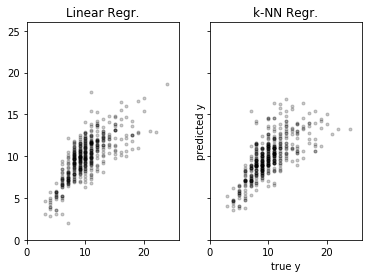

In [23]:
fig_h, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plt.xlim([0, 26])
plt.ylim([0, 26])

ax_grid[0].plot(y_test, lin_reg_8f_test, 'k.', alpha=0.2);
ax_grid[0].set_title('Linear Regr.')
plt.xlabel('true y')
plt.ylabel('predicted y')

ax_grid[1].plot(y_test, pred_test, 'k.', alpha=0.2);
plt.title('k-NN Regr.')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.show()

# Part II - Analysis of DoctorVisits dataset

## Load Dataset

In [24]:
x_train = pd.read_csv('data_doctorvisits/x_train.csv')
#x_train.head()
y_train = pd.read_csv('data_doctorvisits/y_train.csv')
#y_train.head()
x_valid = pd.read_csv('data_doctorvisits/x_valid.csv')
#x_valid.head()
y_valid = pd.read_csv('data_doctorvisits/y_valid.csv')
#y_valid.head()
x_test = pd.read_csv('data_doctorvisits/x_test.csv')
#x_test.head()
y_test = pd.read_csv('data_doctorvisits/y_test.csv')
#y_test.head()

In [25]:
x_train.head()

,age_in_decades,health_excellent,health_poor,n_chronic_cond,n_years_schooling,income_in_10k_dollars,limited_daily_activity,employed,has_private_insurance,has_medicaid
0,7.1,0.0,0.0,0,8,1.3562,0,0.0,1.0,0.0
1,7.4,0.0,0.0,1,11,2.0113,0,0.0,1.0,0.0
2,8.4,0.0,0.0,3,12,0.6520,0,0.0,1.0,0.0
3,7.9,0.0,0.0,1,7,2.9652,1,0.0,0.0,1.0
4,6.7,0.0,0.0,0,8,0.9778,0,0.0,1.0,0.0


In [26]:
y_train.head()

,doctor_visits_per_year
0,0
1,7
2,7
3,0
4,3


## Descriptive Statistics

In [27]:
x_train.describe()

,age_in_decades,health_excellent,health_poor,n_chronic_cond,n_years_schooling,income_in_10k_dollars,limited_daily_activity,employed,has_private_insurance,has_medicaid
count,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000
mean,7.399883,0.078391,0.124193,1.554316,10.322079,2.564660,0.196418,0.107751,0.774222,0.089841
std,0.636321,0.268825,0.329850,1.368778,3.718260,3.059403,0.397347,0.310111,0.418155,0.285996
min,6.600000,0.000000,0.000000,0.000000,0.000000,-1.012500,0.000000,0.000000,0.000000,0.000000
25%,6.900000,0.000000,0.000000,1.000000,8.000000,0.913725,0.000000,0.000000,1.000000,0.000000
50%,7.300000,0.000000,0.000000,1.000000,11.000000,1.700650,0.000000,0.000000,1.000000,0.000000
75%,7.800000,0.000000,0.000000,2.000000,12.000000,3.188450,0.000000,0.000000,1.000000,0.000000
max,10.900000,1.000000,1.000000,8.000000,18.000000,54.835100,1.000000,1.000000,1.000000,1.000000


## Histogram of Number of Doctor Visits per year

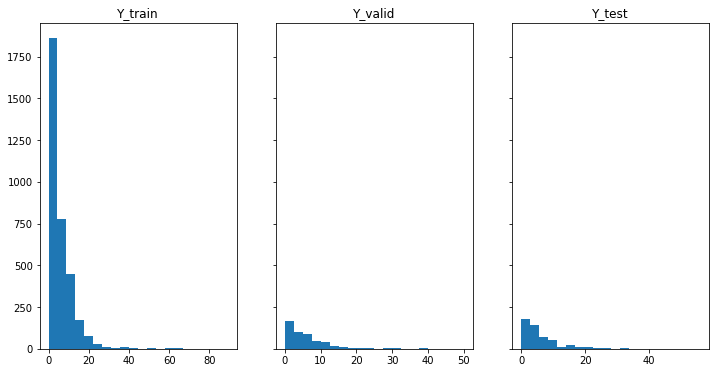

In [28]:
y1 = y_train.values
y2 = y_valid.values
y3 = y_test.values

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,6))
ax1.hist(y1,20)
ax1.set_title('Y_train')
ax2.hist(y2, bins=20)
ax2.set_title('Y_valid')
ax3.hist(y3, bins=20)
ax3.set_title('Y_test')
plt.show()

## Scatter plots looking at number of visits vs age and number of conditions

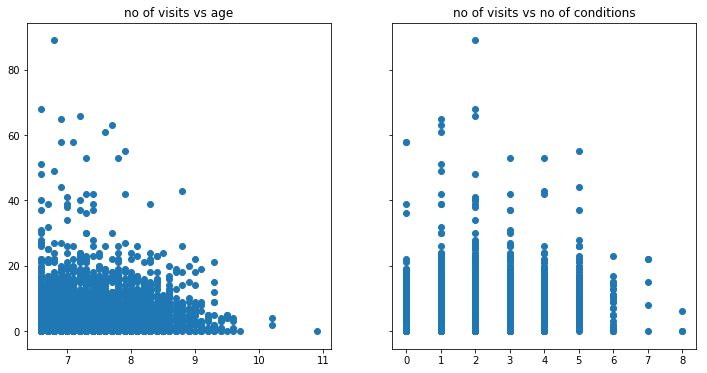

In [29]:
x_train_age = x_train.age_in_decades.values
y_train_visits = y_train.values
x_train_cond = x_train.n_chronic_cond.values

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1.scatter(x_train_age, y_train_visits)
ax1.set_title('no of visits vs age')
ax2.scatter(x_train_cond, y_train_visits)
ax2.set_title('no of visits vs no of conditions')
plt.show()

## Baseline predictions using Mean and Median - calculate MSE

In [30]:
# Calculate MSE for Mean and Median Baseline Predictors

## Training Set
y_train_mean_mae = calc_perf_metric__absolute_error(y_train.mean(), y_train)
y_train_median_mae = calc_perf_metric__absolute_error(y_train.median(), y_train)

## Testing Set
y_test_mean_mae = calc_perf_metric__absolute_error(y_test.mean(), y_test)
y_test_median_mae = calc_perf_metric__absolute_error(y_test.median(), y_test)

## Validation Set
y_valid_mean_mae = calc_perf_metric__absolute_error(y_valid.mean(), y_valid)
y_valid_median_mae = calc_perf_metric__absolute_error(y_valid.median(), y_valid)

results = pd.DataFrame({'split':['train','valid','test'],
                       'guess-mean':[y_train_mean_mae.doctor_visits_per_year, y_valid_mean_mae.doctor_visits_per_year, y_test_mean_mae.doctor_visits_per_year],
                       'guess-median':[y_train_median_mae.doctor_visits_per_year, y_valid_median_mae.doctor_visits_per_year, y_test_median_mae.doctor_visits_per_year]
                       })
results

,split,guess-mean,guess-median
0,train,15307.632413,14405.0
1,valid,2409.100000,2239.0
2,test,2214.736000,2076.0


## Fit Linear Regression with two features - calculate MSE

In [31]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
# fit and evaluate 2 features
linear_regressor_2feats.fit(x_train[['age_in_decades','n_chronic_cond']],y_train)

lin_reg_2f_train = linear_regressor_2feats.predict(x_train[['age_in_decades','n_chronic_cond']])
mae_train_2f = calc_perf_metric__absolute_error(y_train, lin_reg_2f_train)

lin_reg_2f_test = linear_regressor_2feats.predict(x_test[['age_in_decades','n_chronic_cond']])
mae_test_2f = calc_perf_metric__absolute_error(y_test, lin_reg_2f_test)

lin_reg_2f_valid = linear_regressor_2feats.predict(x_valid[['age_in_decades','n_chronic_cond']])
mae_valid_2f = calc_perf_metric__absolute_error(y_valid, lin_reg_2f_valid)
results['linear regr (2 feats)'] = [mae_train_2f.doctor_visits_per_year, mae_valid_2f.doctor_visits_per_year, mae_test_2f.doctor_visits_per_year]
results

,split,guess-mean,guess-median,linear regr (2 feats)
0,train,15307.632413,14405.0,14342.151252
1,valid,2409.100000,2239.0,2208.973708
2,test,2214.736000,2076.0,2077.917266


## Fit Linear Regression with all features - calculate MSE

In [32]:
linear_regressor_10feats = LeastSquaresLinearRegressor()
# fit and evaluate 10 features
linear_regressor_10feats.fit(x_train, y_train)

lin_reg_10f_train = linear_regressor_10feats.predict(x_train)
mae_train_10f = calc_perf_metric__absolute_error(y_train, lin_reg_10f_train)

lin_reg_10f_test = linear_regressor_10feats.predict(x_test)
mae_test_10f = calc_perf_metric__absolute_error(y_test, lin_reg_10f_test)

lin_reg_10f_valid = linear_regressor_10feats.predict(x_valid)
mae_valid_10f = calc_perf_metric__absolute_error(y_valid, lin_reg_10f_valid)
results['linear regr (10 feats)'] = [mae_train_10f.doctor_visits_per_year, mae_valid_10f.doctor_visits_per_year, mae_test_10f.doctor_visits_per_year]
results

,split,guess-mean,guess-median,linear regr (2 feats),linear regr (10 feats)
0,train,15307.632413,14405.0,14342.151252,14039.964903
1,valid,2409.100000,2239.0,2208.973708,2149.370325
2,test,2214.736000,2076.0,2077.917266,2044.284160


## Train a DecisionTreeRegressor 

In [33]:
# Use the DecisionTreeRegressor class provided by sklearn.

# Try various values for parameter min_samples_leaf 
# min_sample_leaf = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, N]

In [34]:
min_samples_leaf = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, 3406]
train_mae = []
valid_mae = []
test_mae = []
for M in min_samples_leaf:
    model = DecisionTreeRegressor(min_samples_leaf=M, random_state=42)
    model.fit(x_train, y_train)  #fit the model
    pred_train = model.predict(x_train) #make prediction on train set
    pred_test = model.predict(x_test) #make prediction on test set
    pred_valid = model.predict(x_valid) #make prediction on validation set
    error_train = mean_absolute_error(y_train, pred_train) #calculate mae for train set
    error_test = mean_absolute_error(y_test, pred_test) #calculate mae for test set
    error_validation = mean_absolute_error(y_valid, pred_valid) #calculate mae for validation set
    train_mae.append(error_train)
    test_mae.append(error_test) #store mae values
    valid_mae.append(error_validation)

### Line plot of mean absolute error(MAE) vs min_samples_leaf

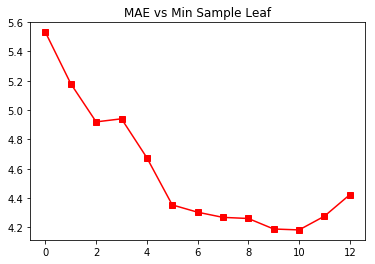

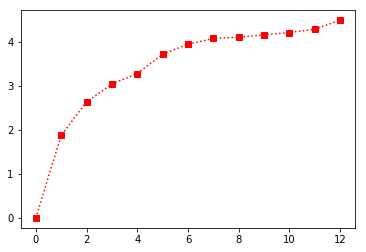

In [35]:
#plotting the mse values against k values
curve = pd.DataFrame(test_mae) #elbow curve 
curve.plot(title='MAE vs Min Sample Leaf', legend=False, style='rs-')
curve = pd.DataFrame(train_mae)
curve.plot(legend=False, style='rs:')
plt.show()

### Mean Absolute Error

In [36]:
M=10 # best K-NN regressor
results['decision tree (MSE)'] = [train_mae[5], valid_mae[5], test_mae[5]]
results

,split,guess-mean,guess-median,linear regr (2 feats),linear regr (10 feats),decision tree (MSE)
0,train,15307.632413,14405.0,14342.151252,14039.964903,3.721906
1,valid,2409.100000,2239.0,2208.973708,2149.370325,4.853776
2,test,2214.736000,2076.0,2077.917266,2044.284160,4.353488


## DecisionTreeRegressor with MAE Training Criterion

In [37]:
min_samples_leaf = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, 3406]
train_mae = []
valid_mae = []
test_mae = []
for M in min_samples_leaf:
    model = DecisionTreeRegressor(criterion='mae', min_samples_leaf=M, random_state=42)
    model.fit(x_train, y_train)  #fit the model
    pred_train = model.predict(x_train) #make prediction on train set
    pred_test = model.predict(x_test) #make prediction on test set
    pred_valid = model.predict(x_valid) #make prediction on validation set
    error_train = mean_absolute_error(y_train, pred_train) #calculate mae for train set
    error_test = mean_absolute_error(y_test, pred_test) #calculate mae for test set
    error_validation = mean_absolute_error(y_valid, pred_valid) #calculate mae for validation set
    train_mae.append(error_train)
    test_mae.append(error_test) #store mae values
    valid_mae.append(error_validation)

### Line plot of mean absolute error vs min_samples_leaf

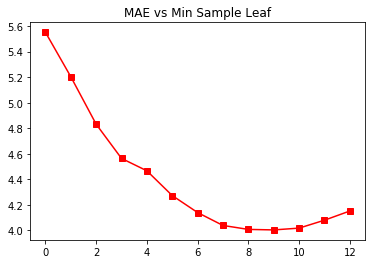

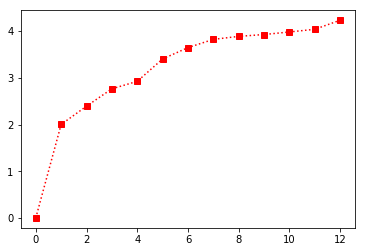

In [38]:
# plotting the mae values against k values
curve = pd.DataFrame(test_mae) #elbow curve 
curve.plot(title='MAE vs Min Sample Leaf', legend=False, style='rs-')
curve = pd.DataFrame(train_mae)
curve.plot(legend=False, style='rs:')
plt.show()

### Mean Absolute Error

In [39]:
M=10 # best K-NN regressor
results['decision tree (MAE)'] = [train_mae[5], valid_mae[5], test_mae[5]]
results

,split,guess-mean,guess-median,linear regr (2 feats),linear regr (10 feats),decision tree (MSE),decision tree (MAE)
0,train,15307.632413,14405.0,14342.151252,14039.964903,3.721906,3.401644
1,valid,2409.100000,2239.0,2208.973708,2149.370325,4.853776,4.601000
2,test,2214.736000,2076.0,2077.917266,2044.284160,4.353488,4.273000
